##Lecture 10 Take-home Exercises.  Discussion is allowed. 
Due: March 3, 2021.

Author of exercise part: [Yunting Chiu](https://www.linkedin.com/in/yuntingchiu)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import imageio
import sys
import cv2 as cv
import sys

Exericse 0 Basic Image FFT. 

DFT or Discrete Fourier Transform is an algorithm that computes the Fourier transform of a digitized (discrete) signal. FFT (Fast Fourier Transform) is an optimized implementation of this transform.

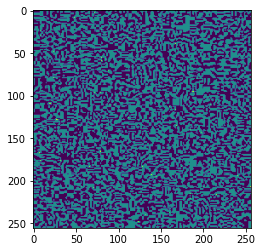

In [3]:
random_img = np.random.random((256,256))
cv.imwrite('random_img.jpg', random_img) 
Z = np.random.random((256,256))   # Test data

# show the img
random_img = imageio.imread("random_img.jpg")
plt.figure()
plt.imshow(random_img)

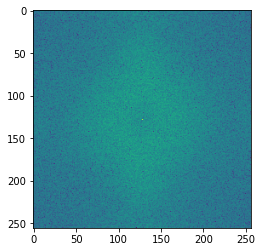

In [4]:
# compute the Fast Fourier Transform, finish the code below 
f = np.fft.fft2(random_img)  # convert into Fourier spectrum
fshift = np.fft.fftshift(f)  # shifting the origin to 0
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure()
plt.imshow(magnitude_spectrum)

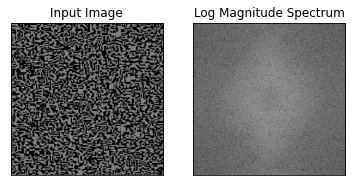

In [5]:
# display the original image and FFT
plt.subplot(121),plt.imshow(random_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Log Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [6]:
# diagonal image
diag_img = 100*np.identity(255)

# To do compute the FFT
f = np.fft.fft2(diag_img)
fshift = np.fft.fftshift(f) 
magnitude_spectrum = 30* np.log(np.abs(fshift))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


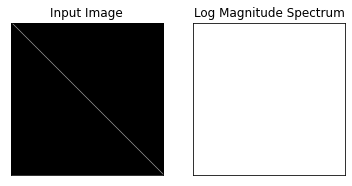

In [7]:
# display the original image and FFT
plt.subplot(121),plt.imshow(diag_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Log Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Exercise 1 Can you manipulate the fourier spectrum and remove low-frequenty of the image. Can you modify it to remove high frequnecy? 

In [50]:
from google.colab import files
uploadImg = files.upload()

Saving my.jpg to my.jpg


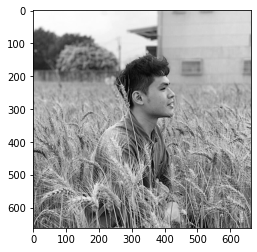

In [9]:
img = imageio.imread('wheat.jpg', as_gray=True)
plt.figure()
plt.imshow(img, cmap='gray')

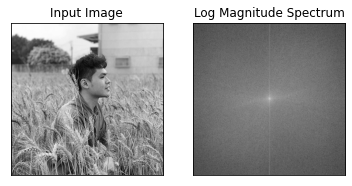

In [10]:
# compute the FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Log Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
# To do. How do you remove the low frequencies Display the DFT magnitutde and the resulting image here
# To do. how do you remove the high frequency?  Display the DFT magnitutde and the resulting image here
##  The following is the code for inverse FFT
## f_isfhit = np.fft.ifftshift(fshift)
##  img_back = np. fft.ifft2(f_ishift)
##.  img_back = np.abs(img_back)

### Remove the low frequecies: center == 0

662 662
331 331
(410178.98180453805+159109.79368938165j) (-577135.0056382667+211965.7658173859j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


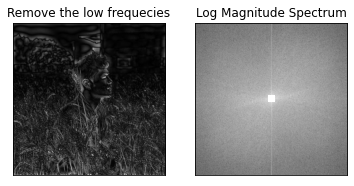

In [15]:
rows, cols = img.shape
print(rows, cols) # 662*662

# center pixel of the img
centerRow, centerCol = round(rows/2), round(cols/2) # slice indices must be integers or None or have an __index__ method
print(centerRow, centerCol)

fshift[centerRow-10: centerRow+10, centerCol-10:centerCol+10] = 0
print(fshift.max(),fshift.min())
magnitude_spectrum = 30*np.log(np.abs(fshift))
f_shift = np.fft.ifftshift(fshift) # The inverse of fftshift
img_back = np.fft.ifft2(f_shift) # Compute the 2-dimensional inverse discrete Fourier Transform
img_back = np.abs(img_back) # must be positive values

# plot
plt.subplot(121),plt.imshow(img_back , cmap = 'gray')
plt.title('Remove the low frequecies'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('DFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()




### Remove the high frequecies: center == 1

Reference: https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Fourier_Transform_FFT_DFT.php

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


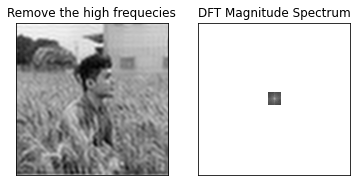

In [30]:
img = imageio.imread('wheat.jpg', as_gray=True)

f = np.fft.fft2(img)
dft_shift = np.fft.fftshift(f)

rows, cols = img.shape
crows, ccols = round(rows/2), round(cols/2) # centralized

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols), np.uint8) # np.uint8 = Unsigned integer (0 to 255)
mask[crows-30:crows+30, ccols-30:ccols+30] = 1 

# apply mask and inverse DFT
fshift = mask*dft_shift
magnitude_spectrum = 30*np.log(np.abs(fshift))
f_shift = np.fft.ifftshift(fshift) # The inverse of fftshift
img_back = np.fft.ifft2(f_shift) # Compute the 2-dimensional inverse discrete Fourier Transform
img_back = np.abs(img_back) # must be positive values

# plot
plt.subplot(121),plt.imshow(img_back , cmap = 'gray')
plt.title('Remove the high frequecies'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('DFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


## Exercise 2. Swich Phase and Magnitude.  read in the Cheetha and Zebra image. 
DFT both iamges in Fourier domain and compute magnitude and phase.  
You can compute phase and magnitude as this:
magnitude_zebra = 30*np.log(np.abs(fshit)
phase_zabera = np.angle(fshift)

In [29]:
# Todo  read in cheeta and zebra images
# FFT cheeta image 
# compute magnitude
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# compute magnitude
magnitude_cheetah = 30*np.log(np.abs(fshift))
# compute phase
phase_cheetah = np.angle(fshift)
# Todo: repeat above with Zebra 
# Todo: Display the original image and the DFT components
# Todo: Please reconstruct the images, please switch phase of zebra and cheeta, and display the final image here

# Cheeta

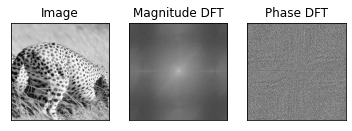

In [34]:
cheeta = imageio.imread("cheetah.png", as_gray = True)
f = np.fft.ifft2(cheeta)
fshift = np.fft.fftshift(f)
magnitude_cheetah = 30*np.log(np.abs(fshift))
phase_cheetah = np.angle(fshift) #compute cheeta
theta = np.cos(phase_cheetah)
re = magnitude_cheetah*theta
im = magnitude_cheetah*np.sin(phase_cheetah)




# plot
plt.subplot(131),plt.imshow(cheeta , cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_cheetah, cmap = 'gray')
plt.title('Magnitude DFT'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_cheetah, cmap = 'gray')
plt.title('Phase DFT'), plt.xticks([]), plt.yticks([])
plt.show()

# 

# Zebra

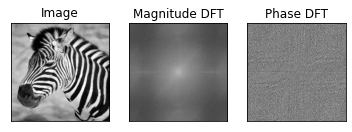

In [52]:
zebra= imageio.imread("zebra.png", as_gray = True)
f = np.fft.ifft2(cheeta)
fshift = np.fft.fftshift(f)
magnitude_zebra = 30*np.log(np.abs(fshift))
phase_zebra = np.angle(fshift) #compute cheeta
theta = np.cos(phase_zebra)
re = magnitude_zebra*theta
im = magnitude_zebra*np.sin(phase_zebra)


# plot
plt.subplot(131),plt.imshow(zebra , cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_zebra, cmap = 'gray')
plt.title('Magnitude DFT'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_zebra, cmap = 'gray')
plt.title('Phase DFT'), plt.xticks([]), plt.yticks([])
plt.show()

# Exercise 3: Simple Image De-nosing 
 Read in the provided image moonlanding.png, which is heavily contaiinated with periorid noise. In this exercise, we aim to clean up the noise using FFT. 
 1. load the image with your favourite lib.
 2. Use the 2DFFT in numpy.fft and plot the spectrum
 3. The specdtrum consists of high and low frequency components. The noise is contained in the high frequency part of the spectrum. So set some of those components to zero. 
 4. Apply the inverse FFT to see the resulting image.

 1. load the image with your favourite lib.

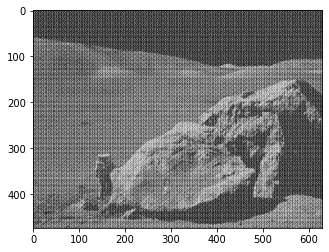

In [108]:
img = imageio.imread("moonlanding.png", as_gray = True)
plt.figure()
plt.imshow(img, cmap='gray')


 2. Use the 2DFFT in numpy.fft and plot the spectrum

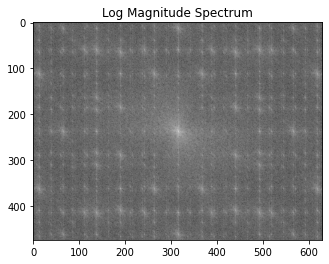

In [109]:
# Use the 2DFFT in numpy.fft and plot the spectrum
f = np.fft.fft2(img) 
fshift = np.fft.fftshift(f) 
magnitude_spectrum = 30*np.log(np.abs(fshift))
plt.title("Log Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

 3. The specdtrum consists of high and low frequency components. The noise is contained in the high frequency part of the spectrum. So set some of those components to zero.
  4. Apply the inverse FFT to see the resulting image.

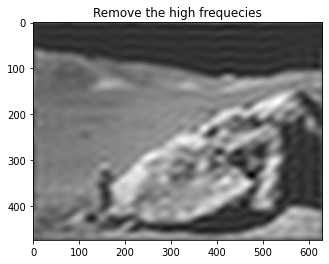

In [111]:
# remove the high frequency
rows, cols = img.shape
crows, ccols = round(rows/2), round(cols/2) # centralized

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols), np.uint8) # np.uint8 = Unsigned integer (0 to 255)
mask[crows-20:crows+20, ccols-20:ccols+20] = 1

# apply mask and inverse DFT
fshift = mask*fshift
f_shift = np.fft.ifftshift(fshift) # The inverse of fftshift
img_back = np.fft.ifft2(f_shift) # Compute the 2-dimensional inverse discrete Fourier Transform
img_back = np.abs(img_back) # must be positive values

# plot
plt.title('Remove the high frequecies')
plt.imshow(img_back, cmap='gray')

## Exercise 4: Filtering in FFT.  Build a Gaussian filter. Then show you can FFT the filter and the signal, multiply them togheter to low-pass the original image.


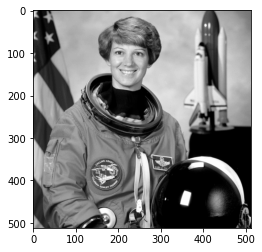

In [112]:
img = imageio.imread('imageio:astronaut.png',as_gray=True)
plt.figure()
plt.imshow(img, cmap='gray')
# image size, square side length, number of squares
ncols, nrows = img.shape


In [ ]:
# FFT the original image
ftimage = np.fft.fft2(img)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.log(np.abs(ftimage)),cmap='gray')
plt.show()

In [ ]:
# Build and apply a Gaussian filter and make sure the size is correct
sigmax, sigmay = 30, 30
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
plt.imshow(X,cmap='gray')
plt.show()

plt.imshow(Y,cmap='gray')
plt.show()

In [ ]:
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))


plt.imshow(gmask,cmap='gray')
plt.show()

In [ ]:
# TODO: filtering in Fourier Domain
# TDDo : # Finally, take the inverse transform and show the blurred image

## Exercise 5, how do you highpass filter the image in FFT domain?
## step one: create a high pass filter in FD and then perform convolution in FD?
# Hint: many ways to create high pass filter 1) sobel, 2) subtract from low-pass
# 3) or something like this: 
#kernel = np.array([[-1, -1, -1],
 #                  [-1,  8, -1],
  #                 [-1, -1, -1]])

In [ ]:
# TOdo: use the above image example, finish the high-passing 